In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

In [3]:
data = pd.read_excel('1.xlsx', index_col=0)
print(data.shape)
data.head(20)

(31594, 29)


,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,0.0,0.0
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,2.0,...,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,5.0,...,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,NaN,US,2.0,...,NaN,9.37,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,5.0,...,NaN,0.00,NaN,NaN,NaN,1.0,NaN,NaN,0.0,0.0


In [4]:
# delete Nah columns
data = data.dropna(axis=1,how='all')

# fill-in the missing values 
# float: fill in the mean of this column
# object: fill in the value of last row 

data.fillna(data.mean(),inplace=True)
data.fillna(method="ffill",inplace=True)# fill in the value of last row
data.fillna(method="bfill",inplace=True)# fill in the value of next row
data.head(20)

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,...,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,2.0,...,2015-03-14,2015-03-14,414.0,414.0,1803.0,PURCHASE,0.00,0.0,0.0,0.0
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,9.0,...,2015-03-14,2015-03-14,486.0,486.0,767.0,PURCHASE,0.00,1.0,0.0,0.0
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486.0,486.0,767.0,PURCHASE,0.00,0.0,0.0,0.0
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,9.0,...,2015-03-14,2015-03-14,486.0,486.0,767.0,PURCHASE,0.00,0.0,0.0,0.0
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,2.0,...,2015-08-06,2015-08-06,885.0,885.0,3143.0,PURCHASE,0.00,1.0,0.0,0.0
5,830329091,830329091,5000,5000.00,2016-04-19T16:24:27,30.76,In-N-Out #422833,US,US,2.0,...,2015-08-06,2015-08-06,885.0,885.0,3143.0,PURCHASE,0.00,1.0,0.0,0.0
6,830329091,830329091,5000,5000.00,2016-05-21T14:50:35,57.28,Krispy Kreme #685312,US,US,2.0,...,2015-08-06,2015-08-06,885.0,885.0,3143.0,PURCHASE,0.00,1.0,0.0,0.0
7,830329091,830329091,5000,5000.00,2016-06-03T00:31:21,9.37,Shake Shack #968081,US,US,5.0,...,2015-08-06,2015-08-06,885.0,885.0,3143.0,PURCHASE,0.00,1.0,0.0,0.0
8,830329091,830329091,5000,4990.63,2016-06-10T01:21:46,523.67,Burger King #486122,US,US,2.0,...,2015-08-06,2015-08-06,885.0,885.0,3143.0,PURCHASE,9.37,1.0,0.0,0.0
9,830329091,830329091,5000,5000.00,2016-07-11T10:47:16,164.37,Five Guys #510989,US,US,5.0,...,2015-08-06,2015-08-06,885.0,885.0,3143.0,PURCHASE,0.00,1.0,0.0,0.0


In [5]:
# encoding
# select 'object' columns 
temp_list = list(data.select_dtypes(include='object'))

from sklearn.preprocessing import LabelEncoder
encoder_list = []
for name in temp_list:
    encoder_list.append(LabelEncoder())
    data[name]=encoder_list[-1].fit_transform(data[name])
    print(encoder_list[-1].classes_)

['2016-01-01T00:01:44' '2016-01-01T00:12:44' '2016-01-01T01:27:58' ...
 '2016-12-30T22:59:15' '2016-12-30T23:16:52' '2016-12-30T23:21:28']
['1st BBQ' '1st Deli' '1st Pub' ... 'walmart.com' 'westelm.com'
 'williamssonoma.com']
['CAN' 'MEX' 'PR' 'US']
['CAN' 'MEX' 'PR' 'US']
['airline' 'auto' 'cable/phone' 'entertainment' 'fastfood' 'food'
 'food_delivery' 'fuel' 'furniture' 'gym' 'health' 'hotels' 'mobileapps'
 'online_gifts' 'online_retail' 'online_subscriptions' 'personal care'
 'rideshare' 'subscriptions']
['01/2020' '01/2021' '01/2022' '01/2023' '01/2024' '01/2025' '01/2026'
 '01/2027' '01/2028' '01/2029' '01/2030' '01/2031' '01/2032' '01/2033'
 '02/2020' '02/2021' '02/2022' '02/2023' '02/2024' '02/2025' '02/2026'
 '02/2027' '02/2028' '02/2029' '02/2030' '02/2031' '02/2032' '02/2033'
 '03/2020' '03/2021' '03/2022' '03/2023' '03/2024' '03/2025' '03/2026'
 '03/2027' '03/2028' '03/2029' '03/2030' '03/2031' '03/2032' '03/2033'
 '04/2020' '04/2021' '04/2022' '04/2023' '04/2024' '04/2025'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31594 entries, 0 to 31593
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   accountNumber             31594 non-null  int64         
 1   customerId                31594 non-null  int64         
 2   creditLimit               31594 non-null  int64         
 3   availableMoney            31594 non-null  float64       
 4   transactionDateTime       31594 non-null  int32         
 5   transactionAmount         31594 non-null  float64       
 6   merchantName              31594 non-null  int32         
 7   acqCountry                31594 non-null  int32         
 8   merchantCountryCode       31594 non-null  int32         
 9   posEntryMode              31594 non-null  float64       
 10  posConditionCode          31594 non-null  float64       
 11  merchantCategoryCode      31594 non-null  int32         
 12  currentExpDate    

In [7]:
# drop accountOpenDate， dateOfLastAddressChange
data = data.drop('accountOpenDate', axis=1)
data = data.drop('dateOfLastAddressChange', axis=1)

In [8]:
# data to numpy
data_numpy = data.to_numpy()
print(data_numpy.shape)

(31594, 21)


In [9]:
# data import
# last column as Label
X = data_numpy[:,:-1]
y = data_numpy[:,-1]

In [10]:
np.unique(y)

array([0.       , 0.0153515, 1.       ])

In [11]:
# transfer 0.0153515 to 0
y = np.round(y)
np.unique(y)

array([0., 1.])

In [12]:
# split
# pre-processing
standard_index = 1 # 1， standardization； 0， non-standardization
if standard_index:
    from sklearn import preprocessing
    scaler = preprocessing.StandardScaler()
    scaler.fit(X)
    X = scaler.transform(X)
normal_index = 0 # 1， normalization； 0， non-normalization
if normal_index:
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler()
    scaler.fit(X)
    X = scaler.transform(X)
    
# splict training set 8:2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)
print(X.shape)
print(X_train.shape)

(31594, 20)
(25275, 20)


### 1. Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier().fit(X_train, y_train)
print(rf_clf)
print('RandomForest training acc is : ', accuracy_score(rf_clf.predict(X_train), y_train))
print('RandomForest test acc is : ', accuracy_score(rf_clf.predict(X_test), y_test))
print('RandomForest training precision is : ', precision_score(rf_clf.predict(X_train), y_train,average='macro'))
print('RandomForest test precision is : ', precision_score(rf_clf.predict(X_test), y_test,average='macro'))
print('RandomForest training recall is : ', recall_score(rf_clf.predict(X_train), y_train,average='macro'))
print('RandomForest test recall is : ', recall_score(rf_clf.predict(X_test), y_test,average='macro'))
print('RandomForest training f1 is : ', f1_score(rf_clf.predict(X_train), y_train,average='macro'))
print('RandomForest test f1 is : ', f1_score(rf_clf.predict(X_test), y_test,average='macro'))
#print('RandomForest training auc is : ', roc_auc_score(y_train, np.max(rf_clf.predict_proba(X_train),1)))
#print('RandomForest test auc is : ', roc_auc_score(y_test, np.max(rf_clf.predict_proba(X_test),1)))
#print(rf_clf.predict(X_val[:,:]))
#print(rf_clf.predict_proba(X_val[:,:]))

RandomForestClassifier()
RandomForest training acc is :  0.9999208704253215
RandomForest test acc is :  0.9879727805032442
RandomForest training precision is :  0.9974160206718345
RandomForest test precision is :  0.6122448979591837
RandomForest training recall is :  0.9999598232221776
RandomForest test recall is :  0.9939653803398444
RandomForest training f1 is :  0.9986845740164049
RandomForest test f1 is :  0.6802977046386537


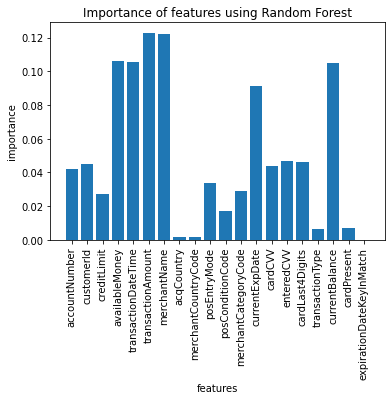

In [14]:
# Feature Importance
temp = list(data)[:-1]
import matplotlib.pyplot as plt
plt.figure()
plt.bar(temp, rf_clf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Importance of features using Random Forest')
plt.xlabel('features')
plt.ylabel('importance')
plt.show()



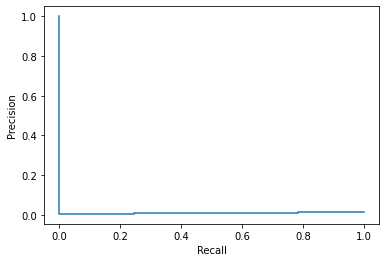

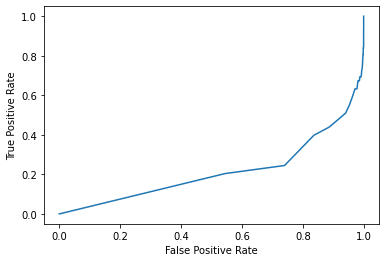

In [15]:
# p-r,fpr-tpr graph
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = np.max(rf_clf.predict_proba(X_test),1)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=rf_clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=rf_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()


### 2. SVM

In [16]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear', probability=True).fit(X_train, y_train)
print(svm_clf)


SVC(kernel='linear', probability=True)


In [17]:
print('SVC training acc is : ', accuracy_score(svm_clf.predict(X_train), y_train))
print('SVC test acc is : ', accuracy_score(svm_clf.predict(X_test), y_test))
print('SVC training precision is : ', precision_score(svm_clf.predict(X_train), y_train,average='macro'))
print('SVC test precision is : ', precision_score(svm_clf.predict(X_test), y_test,average='macro'))
print('SVC training recall is : ', recall_score(svm_clf.predict(X_train), y_train,average='macro'))
print('SVC test recall is : ', recall_score(svm_clf.predict(X_test), y_test,average='macro'))
print('SVC training f1 is : ', f1_score(svm_clf.predict(X_train), y_train,average='macro'))
print('SVC test f1 is : ', f1_score(svm_clf.predict(X_test), y_test,average='macro'))

SVC training acc is :  0.9846884272997033
SVC test acc is :  0.9844912169647096
SVC training precision is :  0.5
SVC test precision is :  0.5
SVC training recall is :  0.49234421364985165
SVC test recall is :  0.4922456084823548
SVC training f1 is :  0.49614257520483224
SVC test f1 is :  0.49609250398724086


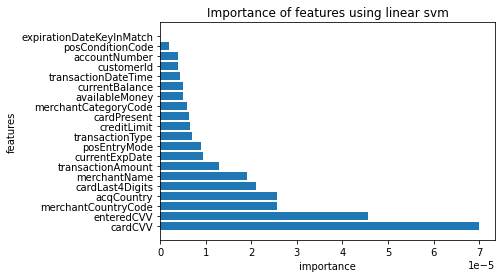

In [18]:
# Feature Importance

import matplotlib.pyplot as plt
def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('Importance of features using linear svm')
    plt.ylabel('features')
    plt.xlabel('importance')
    plt.show()
f_importances(abs(svm_clf.coef_[0]), list(data)[:-1], top=len(list(data)[:-1]))

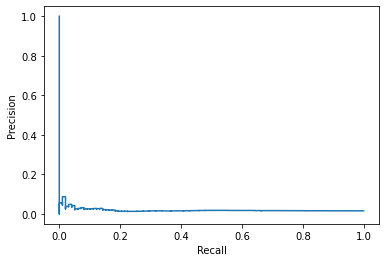

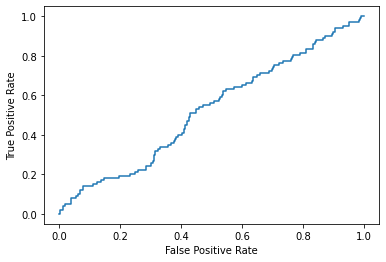

In [19]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = np.max(svm_clf.predict_proba(X_test),1)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=svm_clf.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=svm_clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()



### 3. Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB().fit(X_train, y_train)
print(nb_clf)

GaussianNB()


In [21]:
print('nb training acc is : ', accuracy_score(nb_clf.predict(X_train), y_train))
print('nb test acc is : ', accuracy_score(nb_clf.predict(X_test), y_test))
print('nb training precision is : ', precision_score(nb_clf.predict(X_train), y_train,average='macro'))
print('nb test precision is : ', precision_score(nb_clf.predict(X_test), y_test,average='macro'))
print('nb training recall is : ', recall_score(nb_clf.predict(X_train), y_train,average='macro'))
print('nb test recall is : ', recall_score(nb_clf.predict(X_test), y_test,average='macro'))
print('nb training f1 is : ', f1_score(nb_clf.predict(X_train), y_train,average='macro'))
print('nb test f1 is : ', f1_score(nb_clf.predict(X_test), y_test,average='macro'))

nb training acc is :  0.04545994065281899
nb test acc is :  0.044627314448488685
nb training precision is :  0.5076771844841634
nb test precision is :  0.4997236155352673
nb training recall is :  0.5038992238570233
nb test recall is :  0.4998553039475831
nb training f1 is :  0.04523610173859461
nb test f1 is :  0.04442475904527851


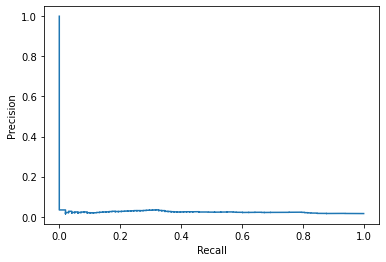

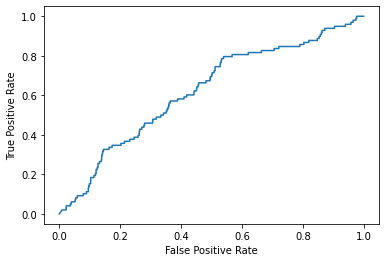

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = np.max(nb_clf.predict_proba(X_test),1)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()




### 4. Decision Trees

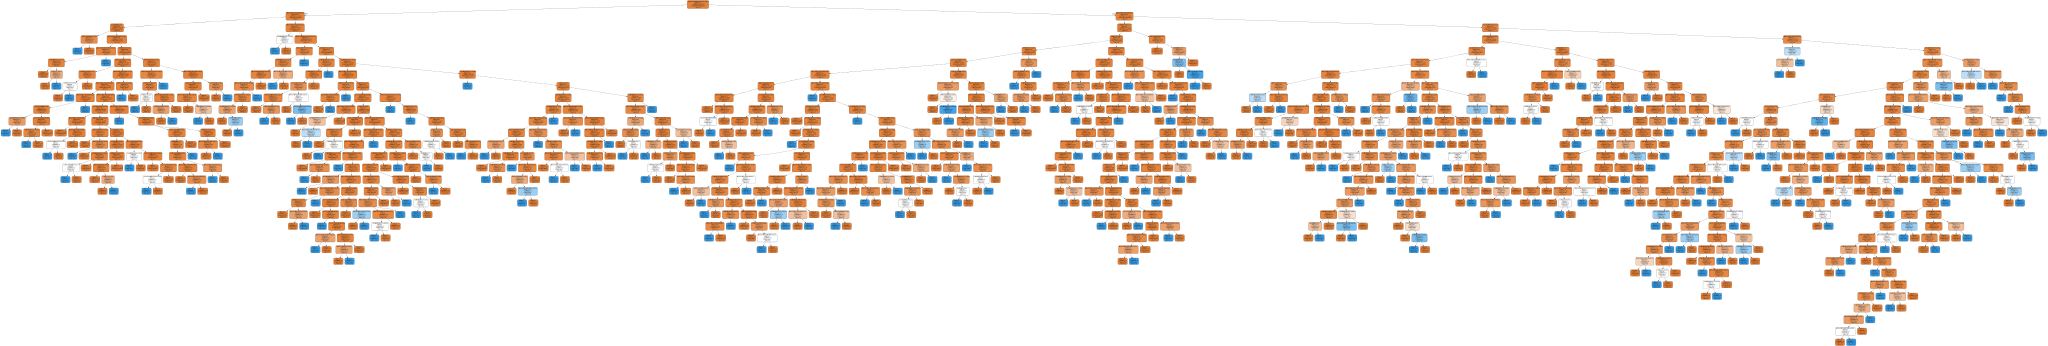

In [23]:
from sklearn import tree
dt_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

import graphviz 
dot_data = tree.export_graphviz(dt_clf, out_file=None, feature_names=list(data)[:-1], class_names=str(np.unique(y)), filled=True, rounded=True,  special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [24]:
print('dt training acc is : ', accuracy_score(dt_clf.predict(X_train), y_train))
print('dt test acc is : ', accuracy_score(dt_clf.predict(X_test), y_test))
print('dt training precision is : ', precision_score(dt_clf.predict(X_train), y_train,average='macro'))
print('dt test precision is : ', precision_score(dt_clf.predict(X_test), y_test,average='macro'))
print('dt training recall is : ', recall_score(dt_clf.predict(X_train), y_train,average='macro'))
print('dt test recall is : ', recall_score(dt_clf.predict(X_test), y_test,average='macro'))
print('dt training f1 is : ', f1_score(dt_clf.predict(X_train), y_train,average='macro'))
print('dt test f1 is : ', f1_score(dt_clf.predict(X_test), y_test,average='macro'))

dt training acc is :  1.0
dt test acc is :  0.9732552619085298
dt training precision is :  1.0
dt test precision is :  0.6399218906337651
dt training recall is :  1.0
dt test recall is :  0.6068295951209127
dt training f1 is :  1.0
dt test f1 is :  0.6209448276131342


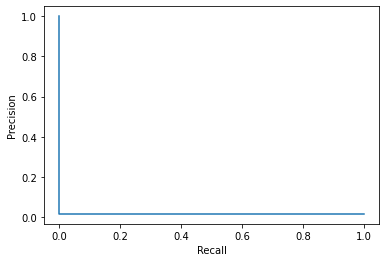

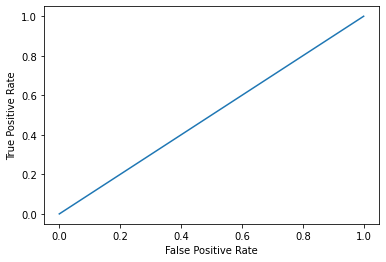

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = np.max(dt_clf.predict_proba(X_test),1)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()





### 5. XGBoost

In [26]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

In [27]:
from xgboost import XGBClassifier
xg_clf = XGBClassifier().fit(X_train, y_train)
print(xg_clf)

[15:26:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=16,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)


In [28]:
print('xg training acc is : ', accuracy_score(xg_clf.predict(X_train), y_train))
print('xg test acc is : ', accuracy_score(xg_clf.predict(X_test), y_test))
print('xg training precision is : ', precision_score(xg_clf.predict(X_train), y_train,average='macro'))
print('xg test precision is : ', precision_score(xg_clf.predict(X_test), y_test,average='macro'))
print('xg training recall is : ', recall_score(xg_clf.predict(X_train), y_train,average='macro'))
print('xg test recall is : ', recall_score(xg_clf.predict(X_test), y_test,average='macro'))
print('xg training f1 is : ', f1_score(xg_clf.predict(X_train), y_train,average='macro'))
print('xg test f1 is : ', f1_score(xg_clf.predict(X_test), y_test,average='macro'))

xg training acc is :  0.9988526211671612
xg test acc is :  0.9874980218388986
xg training precision is :  0.9625322997416021
xg test precision is :  0.617025447053922
xg training recall is :  0.9994180679857125
xg test recall is :  0.9199659767841586
xg training f1 is :  0.980245777323508
xg test f1 is :  0.6808432829856949


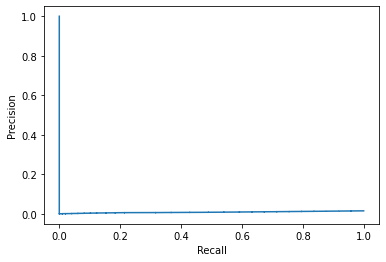

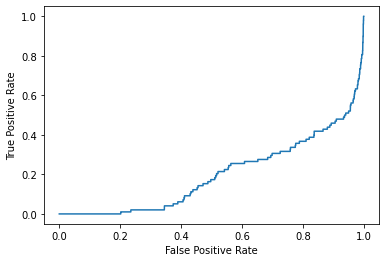

In [29]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = np.max(xg_clf.predict_proba(X_test),1)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()






### 6. GBDT

In [30]:
# GBDT
from sklearn.ensemble import GradientBoostingClassifier
gbm_clf= GradientBoostingClassifier(random_state=10).fit(X_train, y_train)
print(gbm_clf)
print('GBDT training acc is : ', accuracy_score(gbm_clf.predict(X_train), y_train))
print('GBDT test acc is : ', accuracy_score(gbm_clf.predict(X_test), y_test))
print('GBDT training precision is : ', precision_score(gbm_clf.predict(X_train), y_train,average='macro'))
print('GBDT test precision is : ', precision_score(gbm_clf.predict(X_test), y_test,average='macro'))
print('GBDT training recall is : ', recall_score(gbm_clf.predict(X_train), y_train,average='macro'))
print('GBDT test recall is : ', recall_score(gbm_clf.predict(X_test), y_test,average='macro'))

GradientBoostingClassifier(random_state=10)
GBDT training acc is :  0.9887240356083086
GBDT test acc is :  0.9851242285171704
GBDT training precision is :  0.6368705443799072
GBDT test precision is :  0.5756465100105305
GBDT training recall is :  0.9762350306161154
GBDT test recall is :  0.7818669095087337


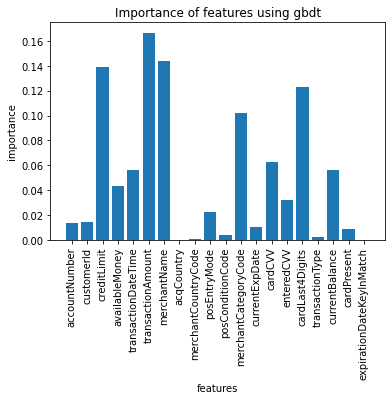

In [31]:
temp = list(data)[:-1]
import matplotlib.pyplot as plt
plt.figure()
plt.bar(temp, gbm_clf.feature_importances_)
plt.xticks(rotation=90)
plt.title('Importance of features using gbdt')
plt.xlabel('features')
plt.ylabel('importance')
plt.show()



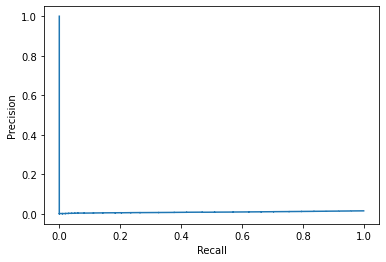

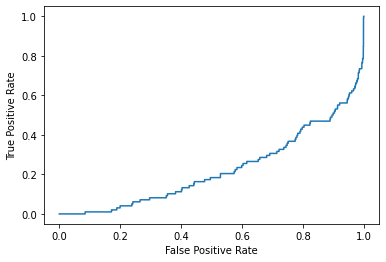

In [32]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

y_score = np.max(gbm_clf.predict_proba(X_test),1)

prec, recall, _ = precision_recall_curve(y_test, y_score, pos_label=1)
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay


fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=1)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
